# 1. Classification Problem Identification

The chronic kidney dataset used in this project is from the [Early Stage of Indians Chronic Kidney Disease (CKD)](https://archive.ics.uci.edu/dataset/336/chronic+kidney+disease), which comprises data on 250 early-stage CKD patients and 150 healthy controls.

The purpose of this project is to establish classification models for healthy individuals and patients with CKD using different classification algorithms and feature engineering, based on the chronic kidney dataset. The dataset provides multiple variables related to patients, such as age, blood pressure, specific gravity, etc. It is necessary to first perform variable feature engineering, then find suitable and interpretable classification model algorithms, and finally evaluate the model.

In [75]:
# Import data set
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Load dataset
CKD_dat = pd.read_csv("https://archive.ics.uci.edu/static/public/336/data.csv")

# Show first 5 rows of dataset
CKD_dat.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


## 2. Variable Transformation

In this step, the types of all variables in the dataset need to be checked to ensure that there are no errors during data analysis. In the dataset, there are a total of 25 variables, including:

- 11 continuous or integer numerical variables: age, blood pressure, blood glucose random, blood urea, serum creativity, sediment, potassium, hemoglobin, packed cell volume, white blood cell count, red blood cell count.
- 3 multivariate categorical variables: specific gravity, albumin, sugar.
- 11 binary categorical variables: red blood cells, pus cells, pus cell clumps, bacteria, hypertension, diabetes mellitus, coronary artery disease, appearance, pedigree, animia, ckd class.

Next, check the variables of imported data set.

In [76]:
CKD_dat.dtypes

age      float64
bp       float64
sg       float64
al       float64
su       float64
rbc       object
pc        object
pcc       object
ba        object
bgr      float64
bu       float64
sc       float64
sod      float64
pot      float64
hemo     float64
pcv      float64
wbcc     float64
rbcc     float64
htn       object
dm        object
cad       object
appet     object
pe        object
ane       object
class     object
dtype: object

Next, all binary categorical variables need to be transformed from character type to 0/1 code dummy variables. And all three multivariate categorical variables have been coded as numeric variables, with given order, which are not need to transform.

In [77]:
# Transform categorical variables
CKD_dat['rbc'] = CKD_dat['rbc'].map({'normal':1, 'abnormal':0}).astype(float)
CKD_dat['pc'] = CKD_dat['pc'].map({'normal':1, 'abnormal':0}).astype(float)
CKD_dat['pcc'] = CKD_dat['pcc'].map({'present':1, 'notpresent':0}).astype(float)
CKD_dat['ba'] = CKD_dat['ba'].map({'present':1, 'notpresent':0}).astype(float)
CKD_dat['htn'] = CKD_dat['htn'].map({'yes':1, 'no':0}).astype(float)
CKD_dat['dm'] = CKD_dat['dm'].map({'yes':1, 'no':0}).astype(float)
CKD_dat['cad'] = CKD_dat['cad'].map({'yes':1, 'no':0}).astype(float)
CKD_dat['appet'] = CKD_dat['appet'].map({'good':1, 'poor':0}).astype(float)
CKD_dat['pe'] = CKD_dat['pe'].map({'yes':1, 'no':0}).astype(float)
CKD_dat['ane'] = CKD_dat['ane'].map({'yes':1, 'no':0}).astype(float)

# Transform CKD class into binary variable
CKD_dat['class'] = CKD_dat['class'].map({'ckd':1, 'notckd':0}).astype(float)

## 3. Data Overview

Next, provide a brief summary and description of the dataset being imported.

In [78]:
# Dataset Dimension
CKD_dat.shape

# Dataset Variable description
CKD_dat.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,391.000000,388.000000,353.000000,354.000000,351.000000,248.000000,335.000000,396.000000,396.000000,356.000000,...,329.000000,294.000000,269.000000,398.000000,397.000000,398.000000,399.000000,399.000000,399.000000,398.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,0.810484,0.773134,0.106061,0.055556,148.036517,...,38.884498,8406.122449,4.707435,0.369347,0.345088,0.085427,0.794486,0.190476,0.150376,0.623116
std,17.169714,13.683637,0.005717,1.352679,1.099191,0.392711,0.419431,0.308305,0.229351,79.281714,...,8.990105,2944.474190,1.025323,0.483235,0.475997,0.279868,0.404584,0.393170,0.357888,0.485216
min,2.000000,50.000000,1.005000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,99.000000,...,32.000000,6500.000000,3.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,121.000000,...,40.000000,8000.000000,4.800000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,1.000000,1.000000,0.000000,0.000000,163.000000,...,45.000000,9800.000000,5.400000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


This data includes 400 observations and 25 variables. Each observation represents a patient (or healthy person). 25 variables were briefly described in the previous step, mainly including 11 continuous or integer numerical variables, 3 multi categorical ordered variables, and 11 binary categorical variables. The following table describes the specific count and distribution of each variable. The count reflects that the vast majority of variables are less than 400, indicating varying degrees of missing information. Other rows provide more statistical indicators about distribution, such as a mean age of 51.48 years and a standard deviation of 17.17 for the samples in the dataset.

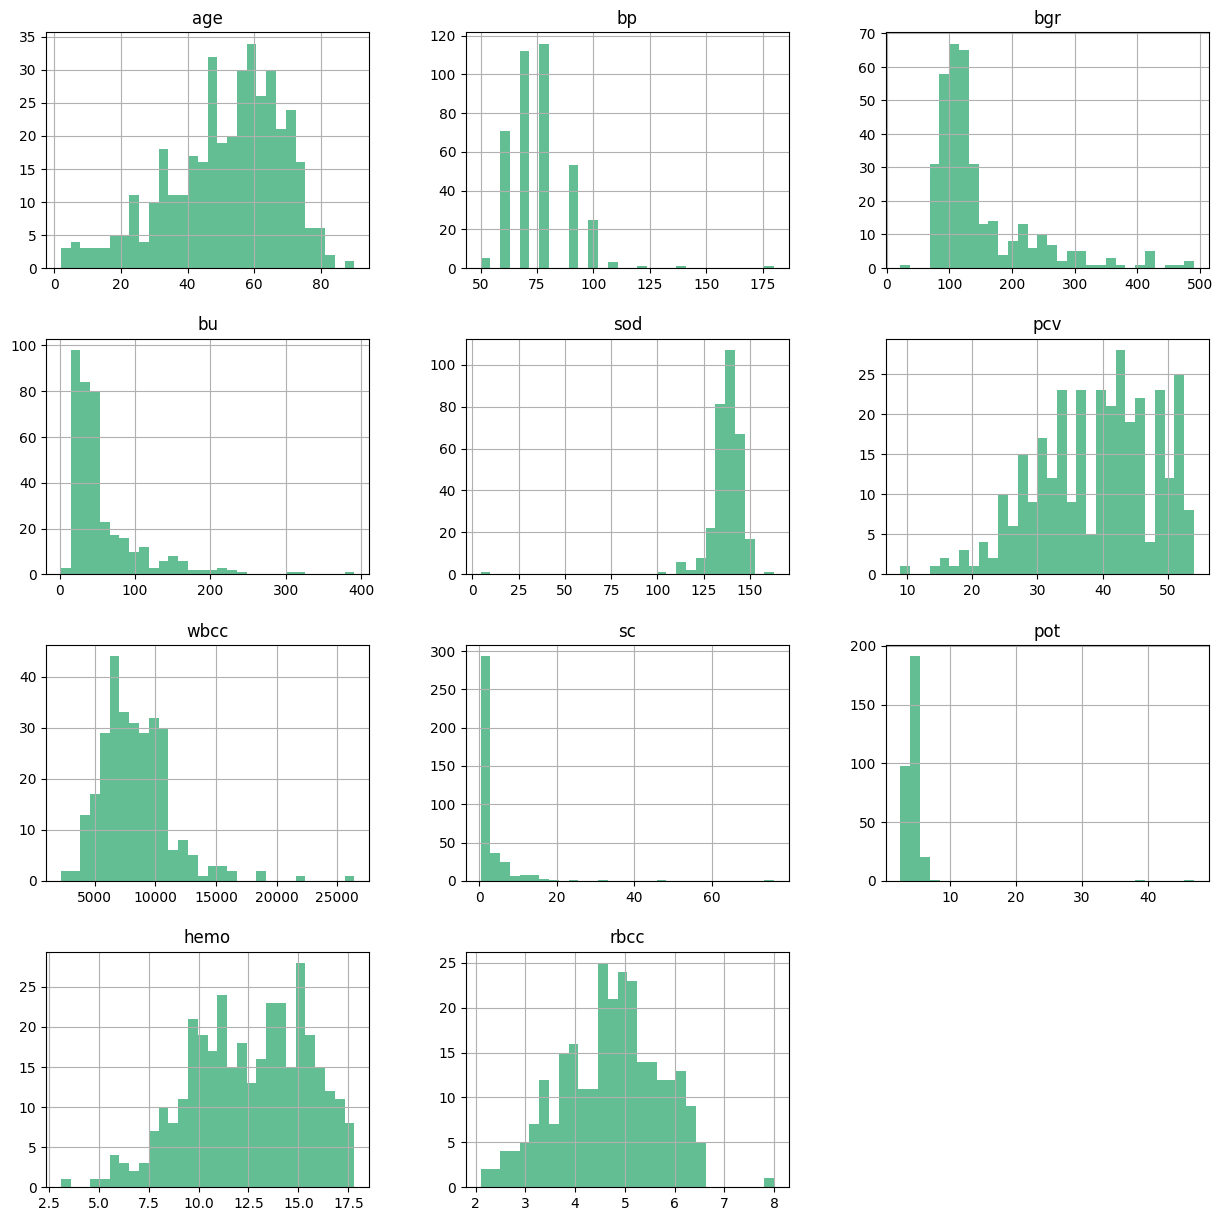

In [79]:
# Numeric Columns
numeric_vars = ['age', 'bp', 'bgr', 'bu', 'sod', 'pcv', 'wbcc', 'sc', 'pot', 'hemo', 'rbcc']

CKD_dat[numeric_vars].hist(bins=30, color='#21a366', alpha=0.7, figsize=(15,15))
plt.show()

The above figure shows the distribution histograms of 11 numerical variables. The age, pcv, hemo, and rbcc in the figure all exhibit an asymmetric left skewed distribution. BGR, BU, and WBCC exhibit a certain right skewed distribution. The distribution of SOD, SC, and Pot is worth being cautious, as these variables are all concentrated in a very small scale range, and there are also extreme distribution points, which may be outliers. In the further analysis, median values of variables will be used to replace missing values.

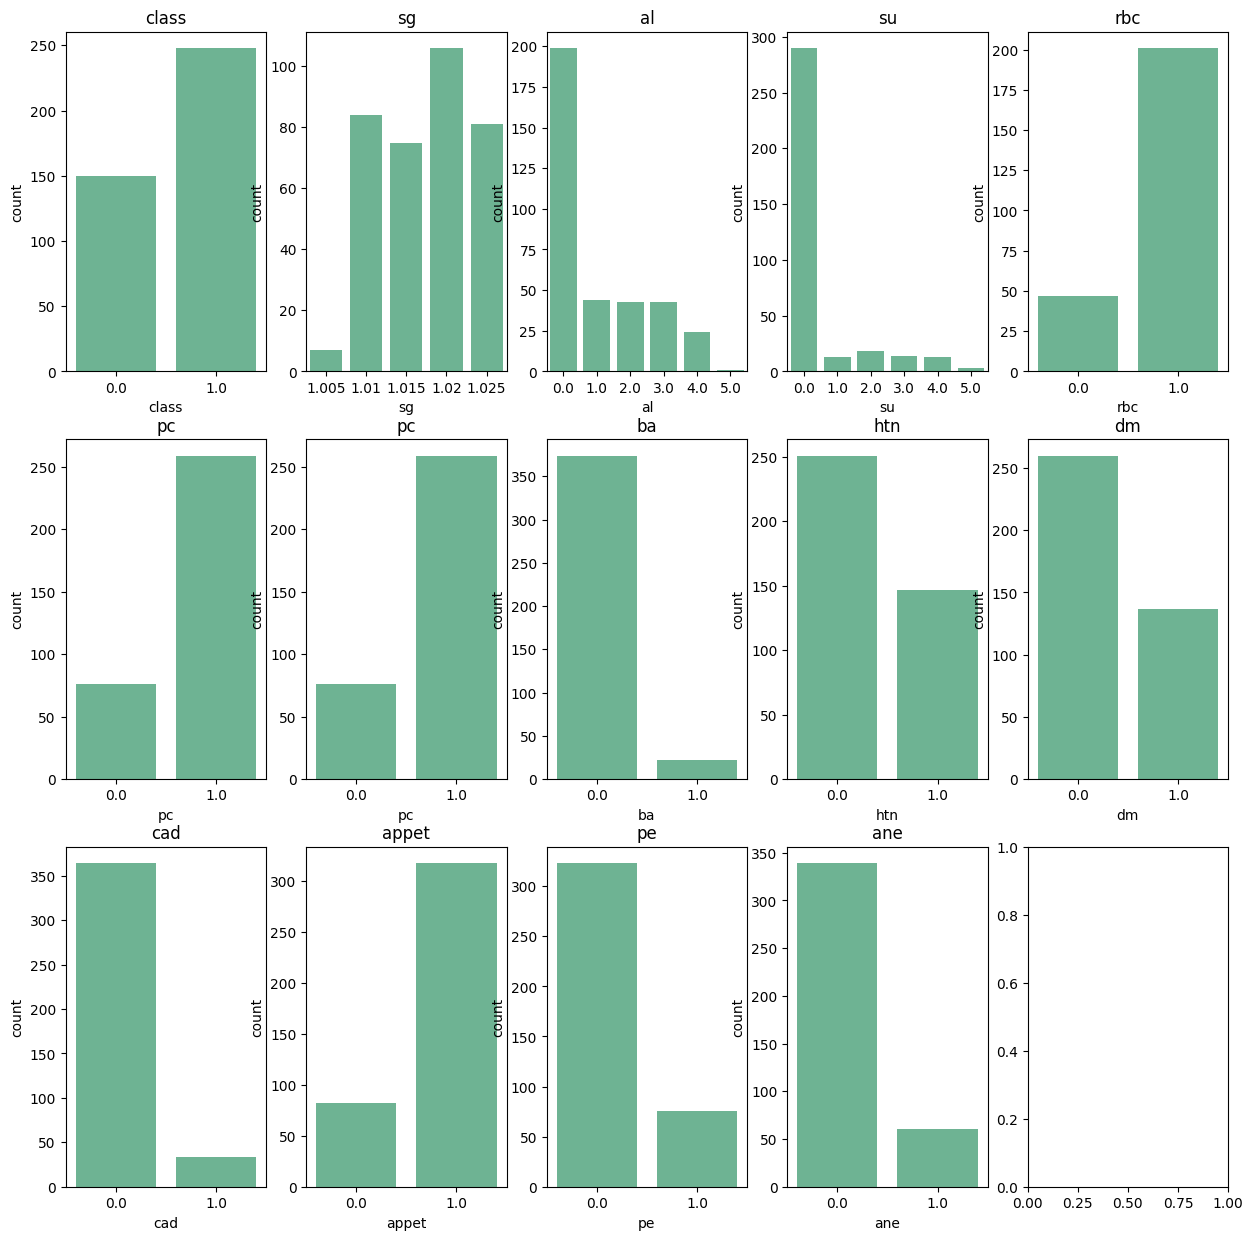

In [80]:
categorical_vars = ['class', 'sg', 'al', 'su', 'rbc', 'pc', 
                    'pc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']

# Subplots
fig, axes = plt.subplots(3, 5, figsize=(15,15))
for i, var in enumerate(categorical_vars):
    row = i // 5
    col = i % 5
    # Bar plot with categories
    sns.countplot(x=var, data=CKD_dat, ax=axes[row, col], color='#21a366', alpha=0.7)
    axes[row, col].set_title(var)

plt.show()

The distribution of 14 categorical variables was presented in the form of a bar chart. In the main outcome variable CKD class, CKD patients account for a relatively high proportion of about 62.5%, while healthy individuals account for about 27.5%. In addition, the classification variables of al, su, ba, and cad are relatively concentrated in one category, and the distribution of other categories is relatively small. Therefore, caution should be exercised when establishing classification models.

## 4. Association between variables

To focus on the correlation between variables, a Pearson correlation coefficient matrix can be established for numerical variables. At the same time, check the multicollinearity relationship between variables based on their VIF values.

In [81]:
CKD_dat_num = CKD_dat[numeric_vars]

# Compute and print correlation matrix
cor_mat = CKD_dat_num.corr()
print(cor_mat)

           age        bp       bgr        bu       sod       pcv      wbcc  \
age   1.000000  0.159480  0.244992  0.196985 -0.100046 -0.242119  0.118339   
bp    0.159480  1.000000  0.160193  0.188517 -0.116422 -0.326319  0.029753   
bgr   0.244992  0.160193  1.000000  0.143322 -0.267848 -0.301385  0.150015   
bu    0.196985  0.188517  0.143322  1.000000 -0.323054 -0.607621  0.050462   
sod  -0.100046 -0.116422 -0.267848 -0.323054  1.000000  0.376914  0.007277   
pcv  -0.242119 -0.326319 -0.301385 -0.607621  0.376914  1.000000 -0.197022   
wbcc  0.118339  0.029753  0.150015  0.050462  0.007277 -0.197022  1.000000   
sc    0.132531  0.146222  0.114875  0.586368 -0.690158 -0.404193 -0.006390   
pot   0.058377  0.075151  0.066966  0.357049  0.097887 -0.163182 -0.105576   
hemo -0.192928 -0.306540 -0.306189 -0.610360  0.365183  0.895382 -0.169413   
rbcc -0.268896 -0.261936 -0.281541 -0.579087  0.344873  0.791625 -0.158163   

            sc       pot      hemo      rbcc  
age   0.132531  

Based on the correlation matrix, there is a strong negative correlation between serum creatinine (sc) and sodium (sod), and the correlation coefficient is -0.69. And, pcv and bu (cor=-0.61), hemo and bu (cor=-0.61), rbc and bu (cor=-0.58) also have negative correlation. And there are strong postive correlation between pcv and hemo (cor=0.90), pcv and rbcc (cor=0.79).

In [82]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
vif_data = pd.DataFrame()

CKD_dat_num = CKD_dat_num.dropna()
vif_data["feature"] = CKD_dat_num.columns

vif_data["VIF"] = [variance_inflation_factor(CKD_dat_num.values, i) for i in range(len(CKD_dat_num .columns))]

print(vif_data)

   feature         VIF
0      age   13.888083
1       bp   33.314145
2      bgr    5.228453
3       bu   10.308152
4      sod  154.643905
5      pcv  106.157383
6     wbcc   10.830481
7       sc    7.157653
8      pot    3.696926
9     hemo  110.751640
10    rbcc   63.753595


The variables SOD, PCV, HEMO and RBCC has extremely high VIF values, which suggests that these variables have multicollinearity with other variables in this dataset.

## 5. Missing Value Analysis and Handling

From previous exploratory analysis, a count value less than 400 indicates the presence of missing values in the vast majority of variables. Therefore, different types of variables require different missing value filling methods.

-Numerical variables: According to exploratory data analysis, the distribution of numerical variables is mostly asymmetric skewed distribution without symmetric normal distribution. Therefore, the replacement of numerical variables will use the median of each variable.
-Typed variables: Fill in the majority groups from each category.

In [83]:
# Replace NA with median values
for var in numeric_vars:
    CKD_dat[var] = CKD_dat[var].fillna(CKD_dat[var].median())

# Replace NA with multiple categrouies
for var in categorical_vars:
    CKD_dat[var] = CKD_dat[var].fillna(CKD_dat[var].mode()[0])

CKD_dat = CKD_dat.dropna()

# Check Missing values count
CKD_dat.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

The NA values replacement in all variables have been done.

## Outlier Analysis

In previous exploratory data analysis, the distribution histogram of numerical variables showed the presence of some extreme points, namely outliers, in some variables. In this section, outlier points are detected and excluded. According to the definition of outliers, values of variables within the upper and lower quartiles of 1.5 IQRs can be considered as outliers. These outliers will be replaced with corresponding upper and lower limits to eliminate the interference of outliers.

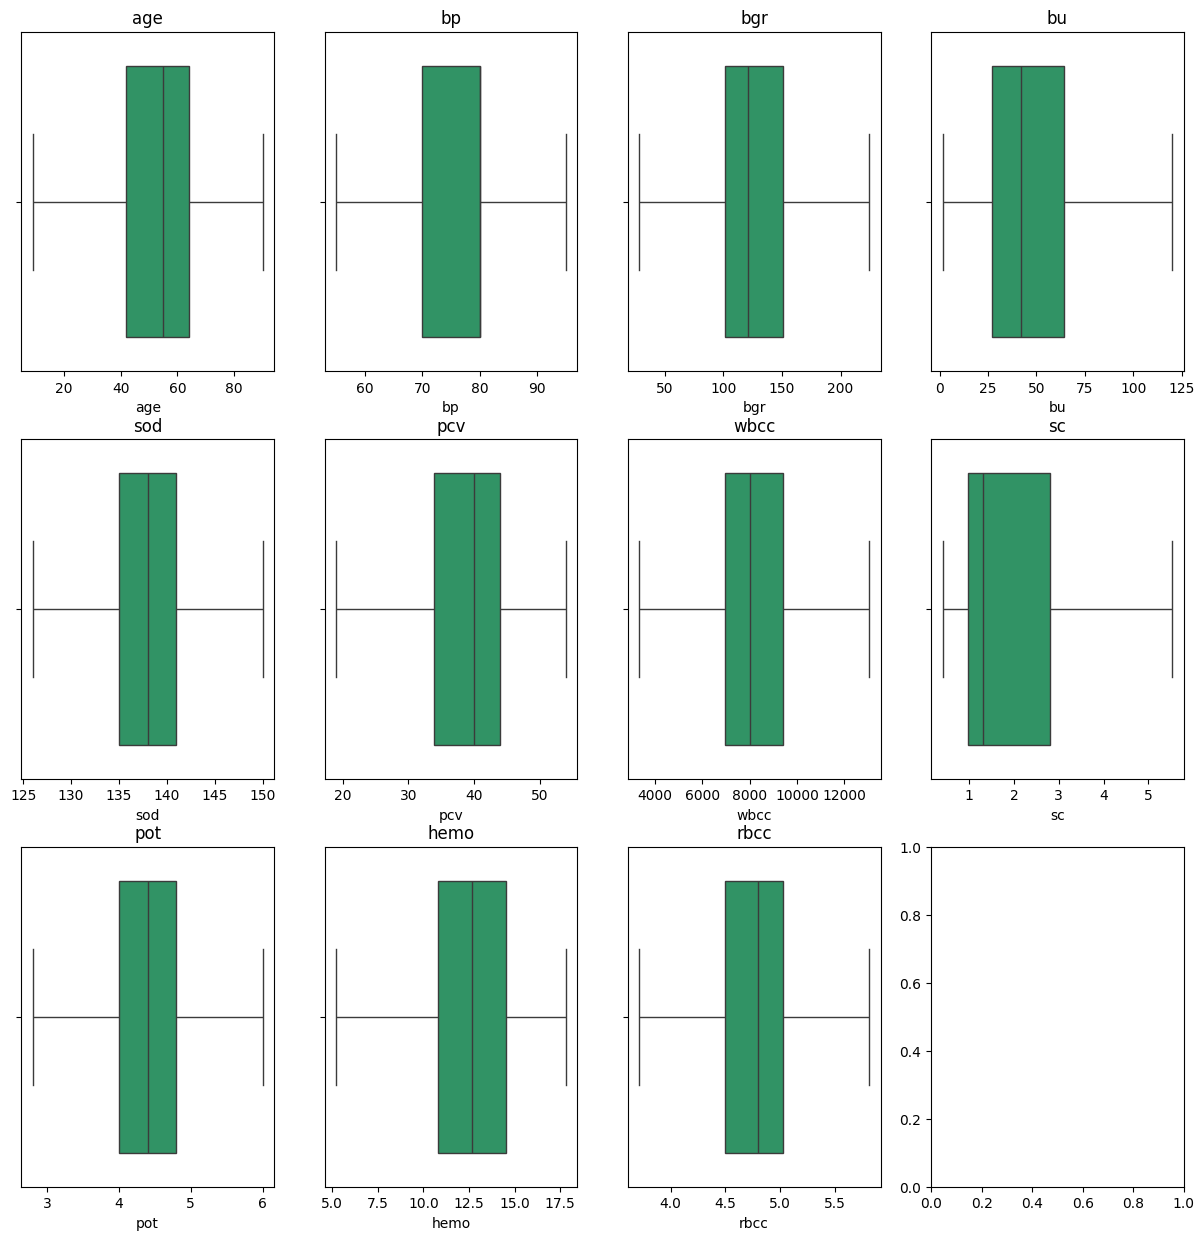

In [84]:
for var in numeric_vars:
    Q1 = CKD_dat[var].quantile(0.25)
    Q3 = CKD_dat[var].quantile(0.75)
    IQR = Q3 - Q1

    # Detect and replace outliers
    CKD_dat[var] = np.where(CKD_dat[var] > Q3+1.5*IQR, Q3+1.5*IQR, CKD_dat[var])
    CKD_dat[var] = np.where(CKD_dat[var] < Q1-1.5*IQR, Q1-1.5*IQR, CKD_dat[var])

# Subplots
fig, axes = plt.subplots(3, 4, figsize=(15,15))
for i, var in enumerate(numeric_vars):
    row = i // 4
    col = i % 4
    # Boxplot
    sns.boxplot(x=CKD_dat[var], ax=axes[row, col], color='#21a366')
    axes[row, col].set_title(var)
plt.show()

From the boxplots, no outliers are shown anymore, which means we have replace all outliers value of numeric variables in the data set. 

## 7. Sub-group Analysis

To explore the possible subgroups in the sample, unsupervised classification methods such as PCA and Kmeans can be used to cluster the sample data and observe the possible subgroups.

In [85]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Data Normalized
scaler = StandardScaler()

features = scaler.fit(CKD_dat[numeric_vars])
features = features.transform(CKD_dat[numeric_vars])

scaled_df = pd.DataFrame(features, columns=numeric_vars)
scaled_df.head(5)

,age,bp,bgr,bu,sod,pcv,wbcc,sc,pot,hemo,rbcc
0,-0.224452,0.375080,-0.289415,-0.477872,-0.034543,0.619459,-0.183534,-0.542900,0.027042,1.063804,0.715939
1,-2.552480,-1.903011,-0.289415,-1.047011,-0.034543,-0.133783,-1.069641,-0.785183,0.027042,-0.455642,0.070448
2,0.611251,0.375080,1.939921,0.059649,-0.034543,-1.012565,-0.331218,-0.179475,0.027042,-1.085656,0.070448
3,-0.224452,-0.536157,-0.375782,0.154505,-2.314400,-0.887025,-0.725044,1.031940,-2.492595,-0.492701,-1.381908
4,-0.045373,0.375080,-0.613290,-0.794060,-0.034543,-0.510404,-0.429675,-0.421758,0.027042,-0.344463,-0.252298


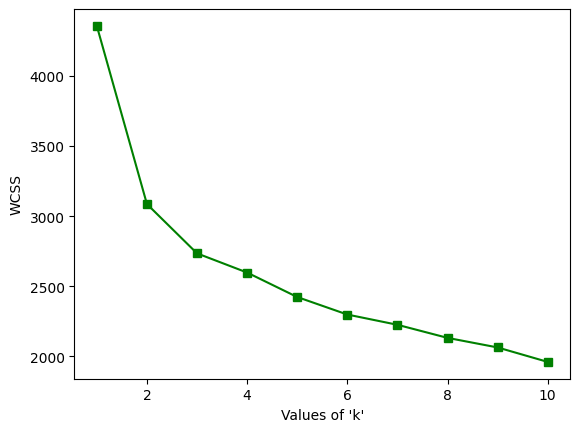

In [86]:
X = scaled_df.values

wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', n_init='auto', random_state=1)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
     
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

From the above graph, there is turning like an elbow at k=2. So, we can say that the right number of cluster for the given datasets is 2.

In [87]:
kmeans=KMeans(n_clusters=2, n_init='auto')
kmeans.fit(X)

KMeans(n_clusters=2)

In [88]:
# PCA for Dimensionality Reduction
pca = PCA(n_components=2)

reduced_X = pd.DataFrame(data=pca.fit_transform(X),
                         columns=['PCA1', 'PCA2'])

centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[-1.52313129,  0.06773986],
       [ 2.08860519, -0.09288879]])

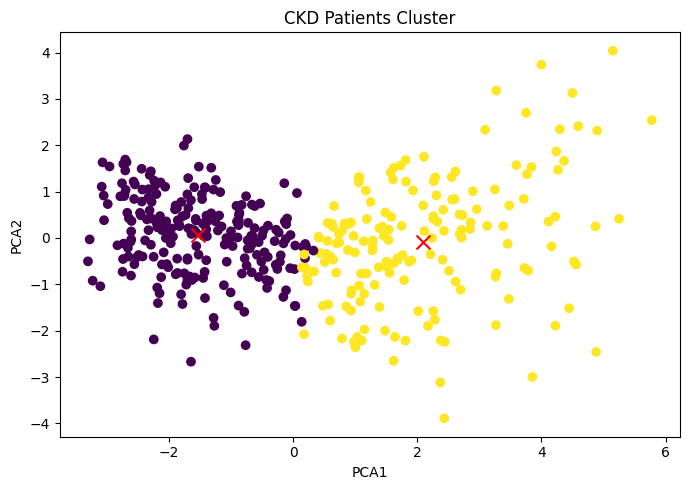

In [89]:
plt.figure(figsize=(7,5))
 
# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('CKD Patients Cluster')
plt.tight_layout()

In [90]:
pca.components_

array([[ 0.17435156,  0.18586397,  0.21349866,  0.37731963, -0.29155531,
        -0.41606264,  0.07831948,  0.40165324,  0.10631135, -0.41833318,
        -0.36773319],
       [-0.25728849,  0.03634404, -0.37392899,  0.20742946, -0.01360489,
         0.00676209, -0.67750202,  0.172309  ,  0.49999895, -0.01622379,
         0.10217398]])

From the above results, the results of Kmeans indicate that the sample can potentially be divided into two subgroups. By using PCA to reduce the dimensionality of all numerical variables, the variables represented by the first principal component are mainly bu, pcv, sc, and hemo; The variables represented by the second principal component are mainly wbcc and pot. It can be observed that the two clustering classifications have the highest discrimination on the first principal component, while the discrimination on the second principal component is relatively average. Regarding the clustering results, it is suggested that the two subgroups in the sample can be distinguished by bu (Blood Urea), pcv (Packed Cell Volume), sc (Serum Creatinine), and hemo (Hemiglobin). If these two subgroups represent CKD patients and normal individuals, then these four variables are likely to be key predictive variables in subsequent classification models.

## 8. Data Splitting

Use the random seed of1, split the dat set into training set (70%) and test set (30%）.

In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    CKD_dat.drop(columns=['class']),
    CKD_dat['class'],
    test_size = 0.30,
    random_state = 1  # Set seed of 1
)

## 9. Classifier Choices

This problem is a binary classification problem. Considering the degree of commonly used models and the interpretability of medical problems, two classification models can be chosen, namely the logistic regression model and the decision tree model. Both models can incorporate multiple variables for classification problems, while the decision tree model can more intuitively display specific classification situations and judgment criteria.

## 10. Performance Metrics

Two commonly used metrics for comparing the performance of classifiers:

- Accuracy: The most common metric and measures the proportion of correctly classified classes out of the total samples.
- Precision and recall: Precision measures the proportion of true positive predictions out of all positive predictions made by the classifier. It indicates the accuracy of positive predictions and recall measures the proportion of true positive predictions out of all actual positive instances in the dataset. It indicates the classifier's ability to find all the positive instances.

These metrics will be used in the further analysis.


## 11&12. Feature Selection & Classifier

The first model is the logistic regression model. The penalty term used in the model is L2 regularization, which uses a ridge regression model for feature selection.

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Construct model
model = LogisticRegression(solver='liblinear', penalty='l2', random_state=1)

# Fit logistic regression model
model.fit(X_train, y_train)

cm = confusion_matrix(y_train, model.predict(X_train))
cm

array([[ 97,   1],
       [  4, 175]], dtype=int64)

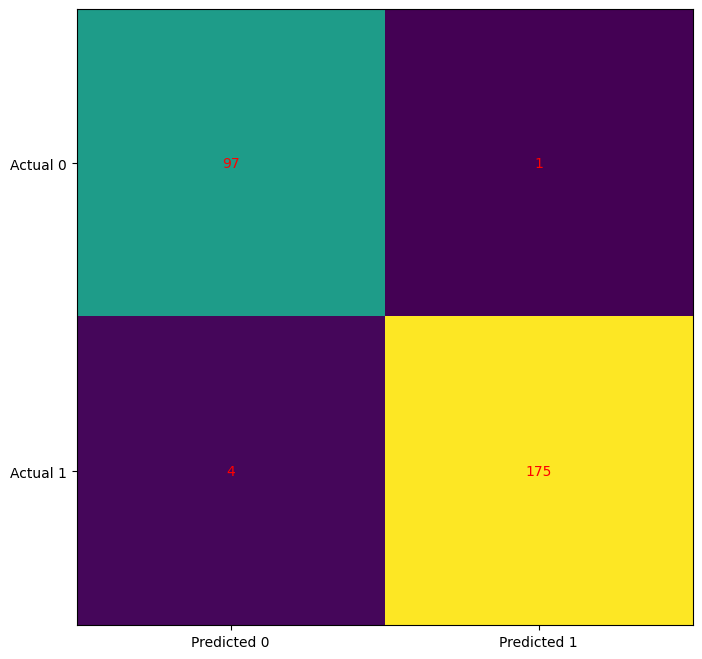

In [93]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [94]:
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        98
         1.0       0.99      0.98      0.99       179

    accuracy                           0.98       277
   macro avg       0.98      0.98      0.98       277
weighted avg       0.98      0.98      0.98       277



In [95]:
# Print Model Coefficients
model.coef_

array([[-1.06705052e-02,  7.93438714e-02,  8.45697081e-02,
         1.70613764e+00,  7.59251932e-01, -2.79811394e-01,
        -3.18059976e-01,  3.09097429e-02,  2.03679788e-02,
         4.56075920e-02, -3.73268061e-03,  1.78545859e+00,
         1.03846102e-01, -3.07382524e-02, -8.50942912e-01,
        -3.35934501e-01, -4.46421774e-06, -4.53024327e-01,
         1.09834696e+00,  1.01074279e+00,  6.54808108e-03,
        -2.03962335e-01,  5.80010271e-01,  4.94688798e-01]])

In [96]:
roc_auc_score(y_train, model.predict_proba(X_train)[:,1])

0.9997149697867974

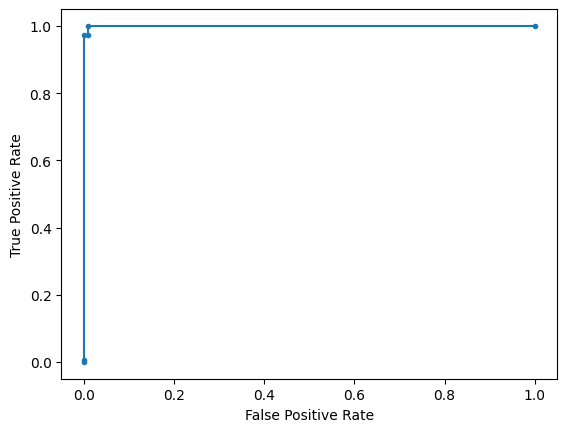

In [97]:
fpr, tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train)[:,1])
plt.plot(fpr, tpr, marker='.', label="Logistic Regression in Train Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [98]:
cm_test = confusion_matrix(y_test, model.predict(X_test))
cm_test

array([[48,  0],
       [ 4, 67]], dtype=int64)

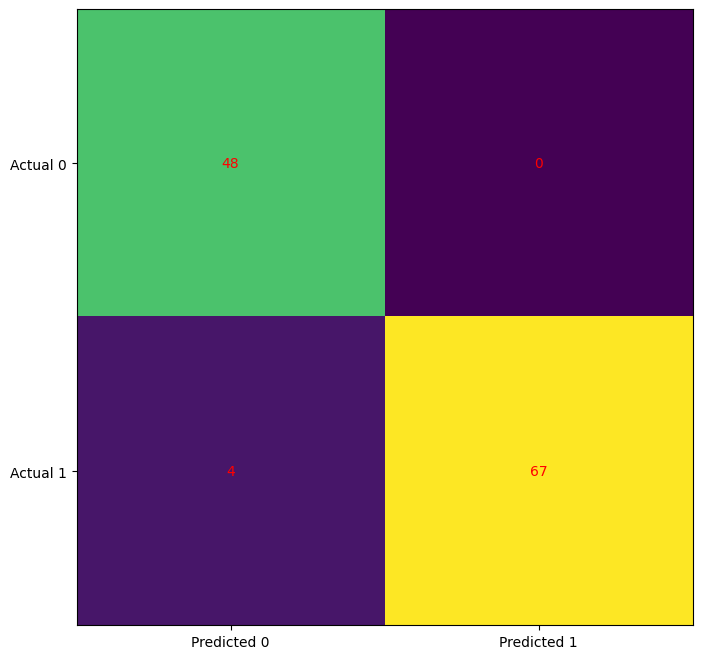

In [99]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm_test)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0', 'Predicted 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0', 'Actual 1'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm_test[i, j], ha='center', va='center', color='red')
plt.show()

In [100]:
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        48
         1.0       1.00      0.94      0.97        71

    accuracy                           0.97       119
   macro avg       0.96      0.97      0.97       119
weighted avg       0.97      0.97      0.97       119



In [101]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9929577464788732

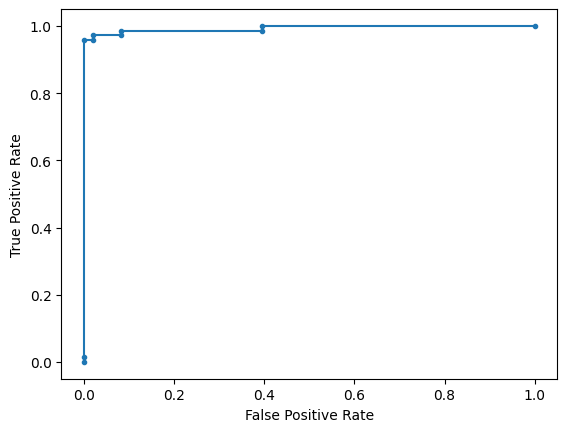

In [102]:
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, marker='.', label="Logistic Regression Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [103]:
from scipy.stats import norm

def logit_pvalue(model, x):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[0]) + 1
    coefs = np.concatenate([model.intercept_, model.coef_[0]])
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

print(logit_pvalue(model, X_train))

[0.9993205  0.71702155 0.19150901 0.99947378 0.03343164 0.53236174
 0.93911698 0.91882284 0.99882153 0.99929764 0.13802293 0.92241087
 0.12569884 0.35393656 0.9772379  0.07885983 0.10201117 0.98804012
 0.69524223 0.64579272 0.63595768 0.99985534 0.95497626 0.82031891
 0.88650806]


In [104]:
model.coef_

array([[-1.06705052e-02,  7.93438714e-02,  8.45697081e-02,
         1.70613764e+00,  7.59251932e-01, -2.79811394e-01,
        -3.18059976e-01,  3.09097429e-02,  2.03679788e-02,
         4.56075920e-02, -3.73268061e-03,  1.78545859e+00,
         1.03846102e-01, -3.07382524e-02, -8.50942912e-01,
        -3.35934501e-01, -4.46421774e-06, -4.53024327e-01,
         1.09834696e+00,  1.01074279e+00,  6.54808108e-03,
        -2.03962335e-01,  5.80010271e-01,  4.94688798e-01]])

In the above analysis, a logistic regression classification model was constructed based on the processed data and the training set data, and predictions were made on the training and testing sets to evaluate the performance of the model.

- On the training set, the predicted accuracy of the model reached 0.99, while the precision reached 0.98, the Recall reached 0.99, and the area under the ROC curve was 0.99;
- On the test set, the predicted accuracy of the model reached 0.96, while the precision reached 0.99, the Recall reached 0.94, and the area under the ROC curve was 0.99;
- By examining the p-values of the coefficients included in the model, variables with significant effect values include sg (Specific Gravity), su (Sugar), bu (Blood Urea), and pcv (Packed Cell Volume).

Next, use the second classification model decision tree model for classification and visualization, and evaluate the predictive performance of the model.

In [105]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
# Build decision tree model
clf = DecisionTreeClassifier()

# Train Decision tree classifier
clf = clf.fit(X_train, y_train)

# Prediction of the train and test
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

print("Train Accuracy: ", accuracy_score(y_train, y_pred_train))
print("Test Accuracy: ", accuracy_score(y_test, y_pred_test))

Train Accuracy:  1.0
Test Accuracy:  0.9747899159663865


[Text(0.6551724137931034, 0.9285714285714286, 'hemo <= 12.9\ngini = 0.457\nsamples = 277\nvalue = [98, 179]'),
 Text(0.5172413793103449, 0.7857142857142857, 'sod <= 148.5\ngini = 0.047\nsamples = 165\nvalue = [4, 161]'),
 Text(0.4482758620689655, 0.6428571428571429, 'rbcc <= 5.406\ngini = 0.036\nsamples = 164\nvalue = [3, 161]'),
 Text(0.27586206896551724, 0.5, 'bu <= 15.5\ngini = 0.024\nsamples = 162\nvalue = [2, 160]'),
 Text(0.13793103448275862, 0.35714285714285715, 'bp <= 65.0\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.06896551724137931, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.20689655172413793, 0.21428571428571427, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.41379310344827586, 0.35714285714285715, 'pcv <= 41.5\ngini = 0.012\nsamples = 159\nvalue = [1, 158]'),
 Text(0.3448275862068966, 0.21428571428571427, 'gini = 0.0\nsamples = 155\nvalue = [0, 155]'),
 Text(0.4827586206896552, 0.21428571428571427, 'bu <= 31.5\ngini = 0.375\nsamp

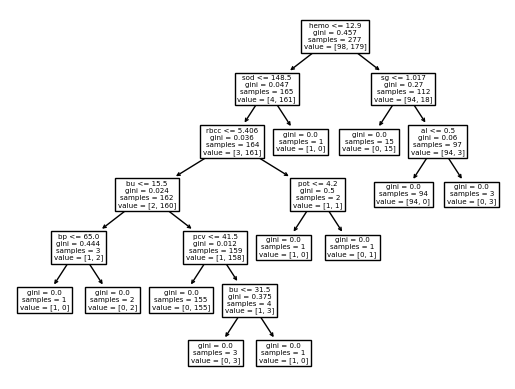

In [106]:
plot_tree(clf, feature_names=X_train.columns)

In [107]:
cm = confusion_matrix(y_test, clf.predict(X_test))
cm

array([[47,  1],
       [ 2, 69]], dtype=int64)

In [108]:
roc_auc_score(y_test, clf.predict_proba(X_test)[:,1])

0.9754988262910799

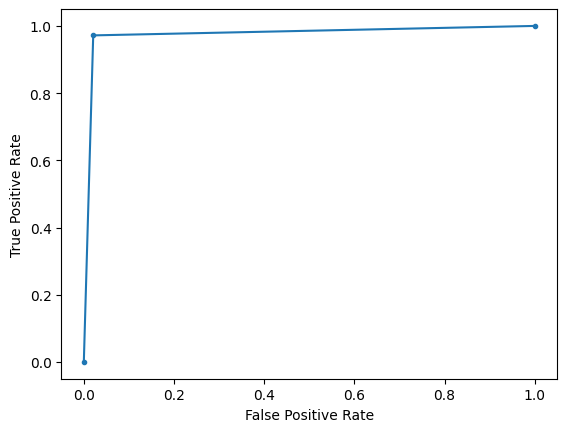

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

plt.plot(fpr, tpr, marker='.', label="Decision Tree Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

According to the fitted decision tree model, the accuracy on the training set reached 1.0, while the accuracy on the test set reached 0.975. According to the Fusion matrix, the Precision on the test set is 0.986, the Recall is 0.972, and the area under the ROC curve of the model is 0.972. From the visualization of the decision tree model, it can be seen that the entire decision tree is divided into 5 layers. The variables and judgment criteria located under the root node are hemo (hemoglobin)<=12.9. Other variables included in the model include sc (serum creativity), sg (specific gravity), bu (blood urea), htn (tension), bp (blood pressure), and al (albumin). In the model for predicting whether a patient has CKD, a total of 7 variables of the patient were included.

## 13. Interpretable Classifier Insight

In this project, the logistic regression model and decision tree model are used for the classification task between CKD patients and normal individuals. Both models can perform classification tasks well, achieving high model classification accuracy and precision, and the area under the ROC curve is also high. The prediction accuracy of the Logetic Regression model is slightly higher than that of the decision tree, but the decision tree can use fewer included variables to complete classification tasks.

Both models have a certain degree of interpretability. In logistic regression, there are four variables whose p-values show significant effects, including sg (Specific Gravity), su (Sugar), bu (Blood Urea), and pcv (Packed Cell Volume). By examining the coefficients, it was found that high-level Specific Gravity, high-level Sugar, high-level Blood Urea, and low-level Packed Cell Volume were the risk factors ultimately predicted for CKD patients.

In the decision tree model, hemoglobin, sc (serum creativity), sg (specific gravity), bu (blood urea), htn (tension), bp (blood pressure), and al (albumin) are used as the final predictive variables. Hemiglobulin, serum creativity, and specific gravity are considered important variables in predicting CKD, especially for low levels of hemiglobulin and high levels of serum creativity.

Comparing the important risk variables of the two models, we found that Specific Gravity level and Blood Urea are common predictors of CKD patient classification. For other variables, there are some differences. This also poses certain challenges for the interpretation of CKD classification models. In the future, multiple classification models can be considered to participate in integrated classification tasks together.

## 14. [Bonus] Sub-group Improvement Strategy

In the previous Kmeans clustering, the samples were divided into two subgroups. By dividing the data into two subgroups and using logistic regression and decision tree models respectively, the prediction results of the two subgroups and the combined prediction performance can be viewed.

In [110]:
CKD_dat['cluster'] = kmeans.labels_
X_train, X_test, y_train, y_test = train_test_split(
    CKD_dat.drop(columns=['class']),
    CKD_dat['class'],
    test_size = 0.30,
    random_state = 1
)

X_train0 = X_train[X_train['cluster'] == 0].drop('cluster', axis=1)
X_train1 = X_train[X_train['cluster'] == 1].drop('cluster', axis=1)
y_train0 = y_train[X_train['cluster'] == 0]
y_train1 = y_train[X_train['cluster'] == 1]

X_test0 = X_test[X_test['cluster'] == 0].drop('cluster', axis=1)
X_test1 = X_test[X_test['cluster'] == 1].drop('cluster', axis=1)
y_test0 = y_test[X_test['cluster'] == 0]
y_test1 = y_test[X_test['cluster'] == 1]

The logistic regression model cannot successfully fit in subgroups because the classification model is very sensitive to the number of labels for outcome variables and must include at least two outcomes. However, in the subgroups we distinguish based on clustering, there is one subgroup that only contains one group 1.0. Therefore, it is not possible to use Logetic regression for successful fitting. This also indirectly illustrates a limitation of subgroup analysis in enhancing classification efficiency. (This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1.0)

In [111]:
# Construct Decision Tree models
clf0 = DecisionTreeClassifier()
clf1 = DecisionTreeClassifier()

# Train Decision tree classifier
clf0.fit(X_train0, y_train0)
clf1.fit(X_train1, y_train1)

# Predictions
cluster0_pred = clf0.predict(X_test0)
cluster1_pred = clf1.predict(X_test1)

# Combine Predictions
combined_pred = np.concatenate((cluster0_pred, cluster1_pred))
combined_actual = np.concatenate((y_test0, y_test1))

# Confusion matrix
cm_combin = confusion_matrix(combined_actual, combined_pred)
cm_combin

array([[47,  1],
       [ 2, 69]], dtype=int64)

In [112]:
print(classification_report(combined_actual, combined_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97        48
         1.0       0.99      0.97      0.98        71

    accuracy                           0.97       119
   macro avg       0.97      0.98      0.97       119
weighted avg       0.98      0.97      0.97       119



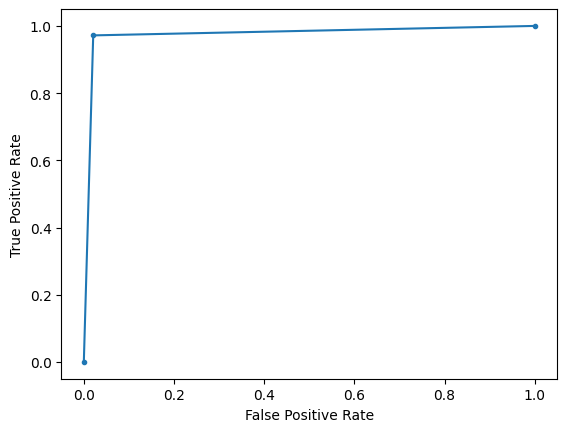

In [113]:
combined_prob = np.concatenate((clf0.predict_proba(X_test0)[:,1], np.squeeze(clf1.predict_proba(X_test1))))

fpr, tpr, thresholds = roc_curve(combined_actual, combined_prob)

plt.plot(fpr, tpr, marker='.', label="Decision Tree Test Set")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [114]:
roc_auc_score(combined_actual, combined_prob)

0.9754988262910799

From the results, after being divided into subgroups, the accuracy of the decision tree prediction model was 0.98, higher than the previous prediction accuracy of 0.975. After dividing by subgroup, only two samples were misjudged. The final model has a precision of 1.00 and a recall of 0.97. Compared with the previous model, precision has improved to some extent, while recall has decreased. The area under the ROC curve of the model is 0.9857, which is a certain degree of improvement compared to the previous 0.9729. This indicates that by distinguishing subgroups, the predictive performance of the classification model on the test set can be improved. However, as the subgroup strategy cannot be used in the logistic regression of this project, it also indicates that this strategy is not applicable to all situations and models.

## 15. Team Contributer

For this Assignment, everyone in our group chose the question that we want to do and finished them. 
Specific completion status of quiestions are presented below:
Xinyue Zhang(400317193): Question 1, 2, 3, 4, 16
Sheng Hui He(400313266): Question 5, 6, 7, 8, 13, 15
Zhaofeng Xu(400307951): Question 9, 10, 11, 12, 14

## 16. Link to the public Github repository

In [ ]:
https://github.com/Shenghhhh/STATS-3DA3-Assignment-6.git